## CARGA Y EXPLORACIÓN DE DATOS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving puno_ult.csv to puno_ult.csv


In [1]:
import pandas as pd
import numpy as np
# Cargar los datos
df = pd.read_csv("puno_ult.csv")

# Mostrar forma y primeras filas
print("Número de registros:", df.shape[0])
print("Número de columnas:", df.shape[1])
print("Columnas disponibles:", df.columns.tolist())
df.head()

Número de registros: 5479
Número de columnas: 22
Columnas disponibles: ['YEAR', 'DOY', 'ALLSKY_SFC_SW_DWN', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'ALLSKY_SFC_LW_DWN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'IMERG_PRECTOT', 'PS', 'WS2M', 'WS2M_MAX', 'WS2M_MIN', 'WD2M', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'ALLSKY_SFC_UV_INDEX']


,YEAR,DOY,ALLSKY_SFC_SW_DWN,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,ALLSKY_SFC_LW_DWN,QV2M,...,IMERG_PRECTOT,PS,WS2M,WS2M_MAX,WS2M_MIN,WD2M,WS10M,WS10M_MAX,WS10M_MIN,ALLSKY_SFC_UV_INDEX
0,2010,1,28.68,10.25,0.96,5.60,16.83,3.55,24.31,6.72,...,-999.0,62.14,2.64,4.20,0.69,65.2,3.28,5.04,0.96,3.71
1,2010,2,28.04,11.10,3.60,7.35,16.74,6.48,24.42,8.00,...,-999.0,62.11,3.66,5.84,1.08,72.4,4.57,7.13,1.62,3.76
2,2010,3,24.10,9.74,4.15,6.95,14.72,6.58,25.28,8.29,...,-999.0,62.11,2.85,4.60,1.03,57.7,3.52,5.56,1.21,3.17
3,2010,4,24.28,10.20,4.37,7.29,15.32,6.14,25.52,8.42,...,-999.0,62.16,3.68,5.82,0.37,58.5,4.60,7.16,0.70,3.32
4,2010,5,26.05,11.29,3.98,7.64,17.72,6.10,24.90,8.19,...,-999.0,62.25,3.86,5.81,2.07,53.0,4.88,7.17,2.96,3.36


In [2]:
# Ver cantidad de valores faltantes por columna
df.replace([-999.0], np.nan, inplace=True)
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
YEAR                      0
DOY                       0
ALLSKY_SFC_SW_DWN         0
T2M                       0
T2MDEW                    0
T2MWET                    0
T2M_MAX                   0
T2M_MIN                   0
ALLSKY_SFC_LW_DWN         0
QV2M                      0
RH2M                      0
PRECTOTCORR               0
IMERG_PRECTOT          5479
PS                        0
WS2M                      0
WS2M_MAX                  0
WS2M_MIN                  0
WD2M                      0
WS10M                     0
WS10M_MAX                 0
WS10M_MIN                 0
ALLSKY_SFC_UV_INDEX       0
dtype: int64


In [3]:
import numpy as np
# Eliminamos solo la columna con valores -999 y el año
df = df.drop(columns=["IMERG_PRECTOT", "YEAR"])
# Verificamos el nuevo tamaño
print("Número de registros después de limpiar:", df.shape[0])

Número de registros después de limpiar: 5479


### Normalización de los datos

In [4]:
print(df.describe())

               DOY  ALLSKY_SFC_SW_DWN          T2M       T2MDEW       T2MWET  \
count  5479.000000        5479.000000  5479.000000  5479.000000  5479.000000   
mean    183.133601          22.921571     8.156627    -1.099611     3.528467   
std     105.453097           4.046607     1.956570     4.737276     3.008183   
min       1.000000           2.540000     0.920000   -18.330000    -7.810000   
25%      92.000000          20.480000     6.770000    -3.895000     1.690000   
50%     183.000000          22.570000     8.360000     0.290000     4.380000   
75%     274.000000          25.530000     9.610000     2.630000     5.860000   
max     366.000000          34.680000    13.060000     6.750000     8.740000   

           T2M_MAX      T2M_MIN  ALLSKY_SFC_LW_DWN         QV2M         RH2M  \
count  5479.000000  5479.000000        5479.000000  5479.000000  5479.000000   
mean     15.236390     2.405519          23.109000     6.019843    58.386976   
std       2.184771     2.692996        

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Normalizamos todos los valores entre 0 y 1 para mejorar el rendimiento del modelo
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Guardamos los nombres de columnas para referencia
column_names = df.columns.tolist()
df_scaled = pd.DataFrame(scaled_data, columns=column_names)
print(df_scaled.describe())

               DOY  ALLSKY_SFC_SW_DWN          T2M       T2MDEW       T2MWET  \
count  5479.000000        5479.000000  5479.000000  5479.000000  5479.000000   
mean      0.498996           0.634150     0.596098     0.687017     0.685104   
std       0.288913           0.125906     0.161167     0.188887     0.181763   
min       0.000000           0.000000     0.000000     0.000000     0.000000   
25%       0.249315           0.558183     0.481878     0.575558     0.574018   
50%       0.498630           0.623211     0.612850     0.742424     0.736556   
75%       0.747945           0.715308     0.715815     0.835726     0.825982   
max       1.000000           1.000000     1.000000     1.000000     1.000000   

           T2M_MAX      T2M_MIN  ALLSKY_SFC_LW_DWN         QV2M         RH2M  \
count  5479.000000  5479.000000        5479.000000  5479.000000  5479.000000   
mean      0.621834     0.569968           0.572688     0.546930     0.544444   
std       0.126069     0.181959        

### Creación de secuencias temporales

In [6]:
# Creamos secuencias de 10 días consecutivos para predecir 7 sdías siguientes
def create_multistep_sequences(data, target_col_index, n_steps=10, n_outputs=7):
    X, y = [], []
    for i in range(n_steps, len(data) - n_outputs + 1):
        X.append(data[i - n_steps:i, :])  # secuencia de entrada (10 días)
        y.append(data[i:i + n_outputs, target_col_index])  # 7 días futuros
    return np.array(X), np.array(y)

target_index = column_names.index("T2M_MAX")
X, y = create_multistep_sequences(scaled_data, target_col_index=target_index)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### División del conjunto en Entrenamiento, Validación y Prueba

In [7]:
import random
import numpy as np
import tensorflow as tf
import os

# Fijar semillas globales
SEED = 1810
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [9]:
# Proporciones
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
test_size = len(X) - train_size - val_size

# División secuencial
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Verificación
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de validación:", X_val.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (3824, 10, 20)
Tamaño de validación: (819, 10, 20)
Tamaño de prueba: (820, 10, 20)


## 2. CONTRUCCIÓN DE MODELO LSTM

### 2.1 Ajuste de hiperparametros

In [10]:
pip install keras-tuner --quiet

Note: you may need to restart the kernel to use updated packages.


In [11]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#  Definir la función que crea el modelo
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            input_shape=(X_train.shape[1], X_train.shape[2]),
            return_sequences=False
        )
    )
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(7))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='mse',
        metrics=['mae']
    )

    return model

In [12]:
# Configurar el RandomSearch o Hyperband
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,              # Número de combinaciones a probar
    executions_per_trial=1,     # Repite cada prueba una vez
    directory='tuning_logs',
    project_name='lstm_temp_puno'
)

Reloading Tuner from tuning_logs\lstm_temp_puno\tuner0.json


In [13]:
# Buscar los mejores hiperparámetros
tuner.search(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

In [14]:
# Obtener los mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hiperparámetros:")
print(f"Unidades LSTM: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Optimizador: {best_hps.get('optimizer')}")

# Construir el modelo final
best_model = tuner.hypermodel.build(best_hps)

Mejores hiperparámetros:
Unidades LSTM: 128
Dropout: 0.30000000000000004
Optimizador: adam


C:\Users\Geraldine\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 2.2 Entrenamiento del modelo

In [15]:
SEED = 1810
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [16]:
# Entrenamos nuevamente el mejor modelo con los datos encontrados
history_best = best_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    shuffle=False
)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1014 - mae: 0.2323 - val_loss: 0.0144 - val_mae: 0.0974
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0220 - mae: 0.1165 - val_loss: 0.0127 - val_mae: 0.0903
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - mae: 0.1085 - val_loss: 0.0118 - val_mae: 0.0869
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177 - mae: 0.1035 - val_loss: 0.0121 - val_mae: 0.0880
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170 - mae: 0.1020 - val_loss: 0.0117 - val_mae: 0.0861
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mae: 0.1007 - val_loss: 0.0114 - val_mae: 0.0846
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0158 - mae: 0.0974 - val_loss: 0.0118 - val_mae: 0.0871
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mae: 0.0971 - val_loss: 0.0115 - val_mae: 0.0853
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - l

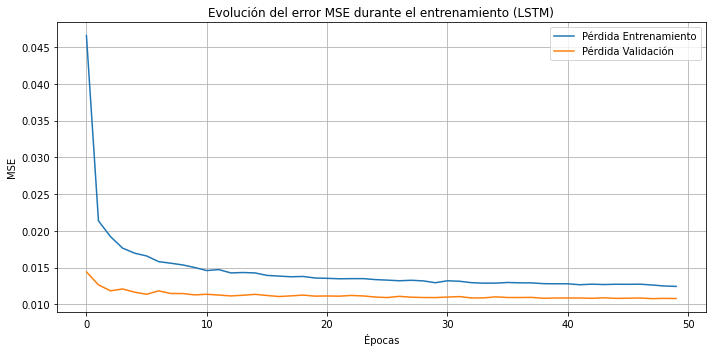

In [19]:
# Visualización de la curva de pérdida
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history_best.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_best.history['val_loss'], label='Pérdida Validación')
plt.title("Evolución del error MSE durante el entrenamiento (LSTM)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.3 Evaluación del modelo

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicción
y_pred_best = best_model.predict(X_test)

# Inversión de normalización (día por día)
T2M_MAX_index = column_names.index("T2M_MAX")
mae_list = []
rmse_list = []
r2_list = []

for i in range(7):  # 7 días predichos
    # Crear dummy para invertir el escalado
    dummy_test = np.zeros((len(y_test), len(column_names)))
    dummy_test[:, T2M_MAX_index] = y_test[:, i]
    y_test_inv = scaler.inverse_transform(dummy_test)[:, T2M_MAX_index]

    dummy_pred = np.zeros((len(y_pred_best), len(column_names)))
    dummy_pred[:, T2M_MAX_index] = y_pred_best[:, i]
    y_pred_inv = scaler.inverse_transform(dummy_pred)[:, T2M_MAX_index]

    # Métricas por día
    mae_list.append(mean_absolute_error(y_test_inv, y_pred_inv))
    rmse_list.append(np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)))
    r2_list.append(r2_score(y_test_inv, y_pred_inv))

# Mostrar métricas por día
for i in range(7):
    print(f"Día {i+1}: MAE = {mae_list[i]:.2f} °C, RMSE = {rmse_list[i]:.2f} °C, R² = {r2_list[i]:.3f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Día 1: MAE = 1.39 °C, RMSE = 1.73 °C, R² = 0.302
Día 2: MAE = 1.56 °C, RMSE = 1.95 °C, R² = 0.120
Día 3: MAE = 1.64 °C, RMSE = 2.03 °C, R² = 0.040
Día 4: MAE = 1.71 °C, RMSE = 2.11 °C, R² = -0.029
Día 5: MAE = 1.73 °C, RMSE = 2.12 °C, R² = -0.048
Día 6: MAE = 1.73 °C, RMSE = 2.14 °C, R² = -0.060
Día 7: MAE = 1.75 °C, RMSE = 2.16 °C, R² = -0.079


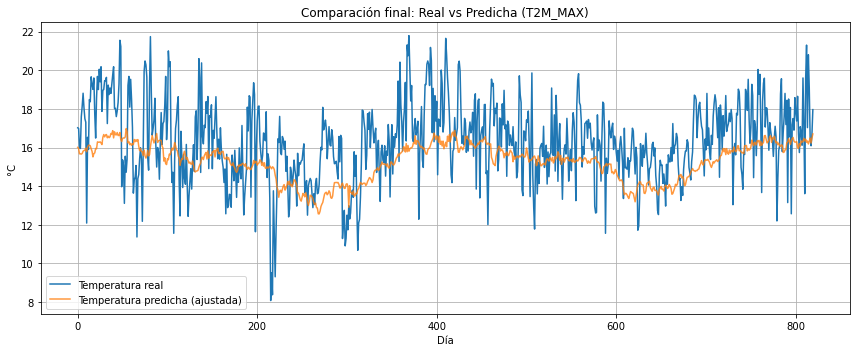

In [22]:
# Visualización de Predicción vs Real
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label="Temperatura real")
plt.plot(y_pred_inv, label="Temperatura predicha (ajustada)", alpha=0.8)
plt.title("Comparación final: Real vs Predicha (T2M_MAX)")
plt.xlabel("Día")
plt.ylabel("°C")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.4 Predicción del modelo

In [19]:
def predict_next_days(model, last_sequence, n_days, column_index):
    predictions = []
    current_seq = last_sequence.copy()

    for _ in range(n_days):
        pred = model.predict(current_seq[np.newaxis, :, :])[0, 0]
        predictions.append(pred)

        # Crear nueva secuencia desplazada
        next_step = current_seq[1:].copy()
        new_entry = current_seq[-1].copy()
        new_entry[column_index] = pred  # Insertamos solo T2M_MAX predicho
        next_step = np.vstack([next_step, new_entry])
        current_seq = next_step

    return np.array(predictions)

Preparar secuencia final y predecir

In [20]:
# Última secuencia del conjunto total (antes de hacer split)
last_sequence = X[-1]

# Índice de T2M_MAX
idx_max = column_names.index("T2M_MAX")

# Predicciones normalizadas
future_preds_lstm_norm = predict_next_days(best_model, last_sequence, n_days=7, column_index=idx_max)

# Invertimos la normalización para convertir a °C
def inverse_predictions(normalized_preds, column_index):
    dummy = np.zeros((len(normalized_preds), len(column_names)))
    dummy[:, column_index] = normalized_preds
    return scaler.inverse_transform(dummy)[:, column_index]

future_preds_lstm = inverse_predictions(future_preds_lstm_norm, idx_max)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


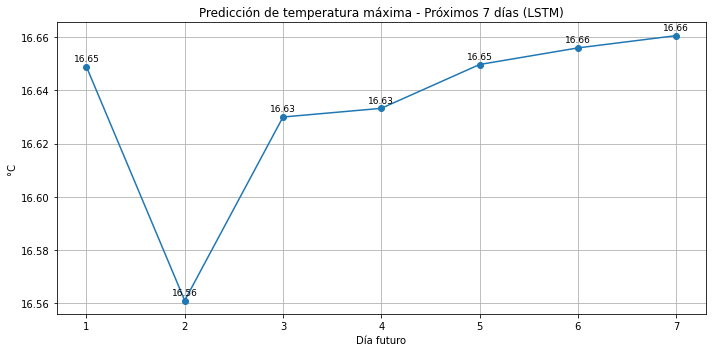

In [21]:
import matplotlib.pyplot as plt

days = list(range(1, 8))

#  visualización de predicciones futuras con LSTM
plt.figure(figsize=(10, 5))
plt.plot(days, future_preds_lstm, marker='o', label="LSTM")
for i, value in enumerate(future_preds_lstm):
    plt.text(days[i], value +0.002, f"{value:.2f}", ha='center', fontsize=9, color='black')
plt.title("Predicción de temperatura máxima - Próximos 7 días (LSTM)")
plt.xlabel("Día futuro")
plt.ylabel("°C")
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. CONTRUCCIÓN DE MODELO GRU

Definir el modelo GRU con los mejores hiperparámetros que ya se obtuvieron

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Creamos un modelo GRU con los mismos hiperparámetros que el mejor LSTM
gru_model = Sequential()
gru_model.add(GRU(128, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(7))  # ← predicción multistep

# Compilamos con el mismo optimizador
gru_model.compile(optimizer='adam', loss='mse')

# Mostramos resumen
gru_model.summary()

C:\Users\Geraldine\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,729 (225.50 KB)

 Trainable params: 57,729 (225.50 KB)

 Non-trainable params: 0 (0.00 B)

### 3.1 Entrenamiemto del modelo

In [23]:
# Entrenamiento del modelo GRU
history_gru = gru_model.fit(X_train, y_train, 
                            epochs=30, 
                            batch_size=32, 
                            validation_data=(X_val, y_val))

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1039 - mae: 0.2304 - val_loss: 0.0092 - val_mae: 0.0764
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174 - mae: 0.1021 - val_loss: 0.0091 - val_mae: 0.0764
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - mae: 0.0911 - val_loss: 0.0085 - val_mae: 0.0721
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0133 - mae: 0.0878 - val_loss: 0.0086 - val_mae: 0.0698
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0127 - mae: 0.0863 - val_loss: 0.0084 - val_mae: 0.0720
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128 - mae: 0.0868 - val_loss: 0.0087 - val_mae: 0.0740
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0125 - mae: 0.0865 - val_loss: 0.0085 - val_mae: 0.0727
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0124 - mae: 0.0853 - val_loss: 0.0083 - val_mae: 0.0698
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

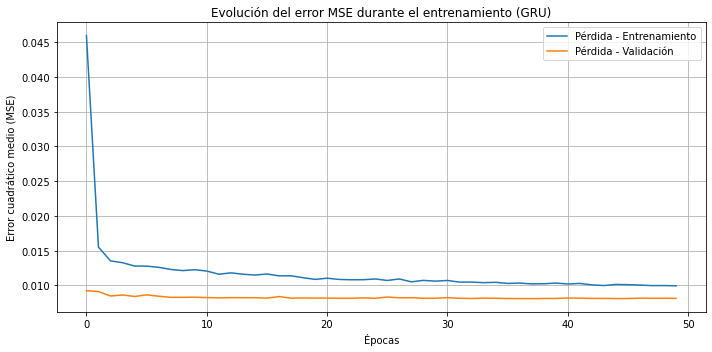

In [24]:
# Curva de pérdida – GRU
plt.figure(figsize=(10, 5))
plt.plot(history_gru.history['loss'], label='Pérdida - Entrenamiento')
plt.plot(history_gru.history['val_loss'], label='Pérdida - Validación')
plt.title("Evolución del error MSE durante el entrenamiento (GRU)")
plt.xlabel("Épocas")
plt.ylabel("Error cuadrático medio (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.2 Evaluación del modelo

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred_gru = gru_model.predict(X_test)

# Invertimos normalización
dummy_test_gru = np.zeros((len(y_test), len(column_names)))
dummy_test_gru[:, T2M_MAX_index] = y_test
y_test_inv_gru = scaler.inverse_transform(dummy_test_gru)[:, T2M_MAX_index]

dummy_pred_gru = np.zeros((len(y_pred_gru), len(column_names)))
dummy_pred_gru[:, T2M_MAX_index] = y_pred_gru.flatten()
y_pred_inv_gru = scaler.inverse_transform(dummy_pred_gru)[:, T2M_MAX_index]

# Métricas
mae_gru = mean_absolute_error(y_test_inv_gru, y_pred_inv_gru)
rmse_gru = np.sqrt(mean_squared_error(y_test_inv_gru, y_pred_inv_gru))
r2_gru = r2_score(y_test_inv_gru, y_pred_inv_gru)

print(f"[GRU] MAE : {mae_gru:.2f} °C")
print(f"[GRU] RMSE: {rmse_gru:.2f} °C")
print(f"[GRU] R²  : {r2_gru:.3f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[GRU] MAE : 1.28 °C
[GRU] RMSE: 1.64 °C
[GRU] R²  : 0.373


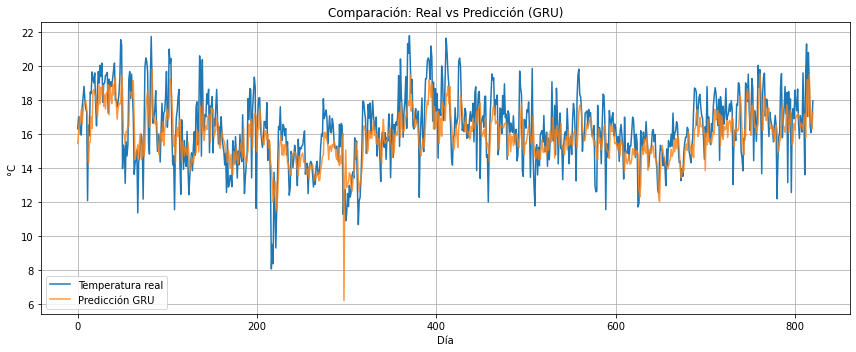

In [26]:
# Gráfico de comparación real vs predicción (GRU)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test_inv_gru, label="Temperatura real")
plt.plot(y_pred_inv_gru, label="Predicción GRU", alpha=0.8)
plt.title("Comparación: Real vs Predicción (GRU)")
plt.xlabel("Día")
plt.ylabel("°C")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.3 Predicción del modelo

In [27]:
# Última secuencia del conjunto total (antes de hacer split)
last_sequence = X[-1]

# Índice de T2M_MAX
idx_max = column_names.index("T2M_MAX")

# Predicciones normalizadas
future_preds_gru_norm  = predict_next_days(gru_model, last_sequence, n_days=7, column_index=idx_max)

# Invertimos la normalización para convertir a °C
def inverse_predictions(normalized_preds, column_index):
    dummy = np.zeros((len(normalized_preds), len(column_names)))
    dummy[:, column_index] = normalized_preds
    return scaler.inverse_transform(dummy)[:, column_index]

future_preds_gru  = inverse_predictions(future_preds_gru_norm, idx_max)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


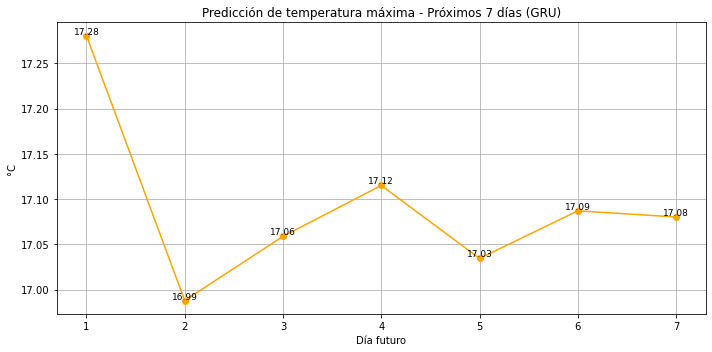

In [28]:
# Gráfico GRU
plt.figure(figsize=(10, 5))
plt.plot(days, future_preds_gru, marker='o', color='orange', label="GRU")
for i, value in enumerate(future_preds_gru):
    plt.text(days[i], value +0.002, f"{value:.2f}", ha='center', fontsize=9, color='black')
plt.title("Predicción de temperatura máxima - Próximos 7 días (GRU)")
plt.xlabel("Día futuro")
plt.ylabel("°C")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. COMPARACIÓN

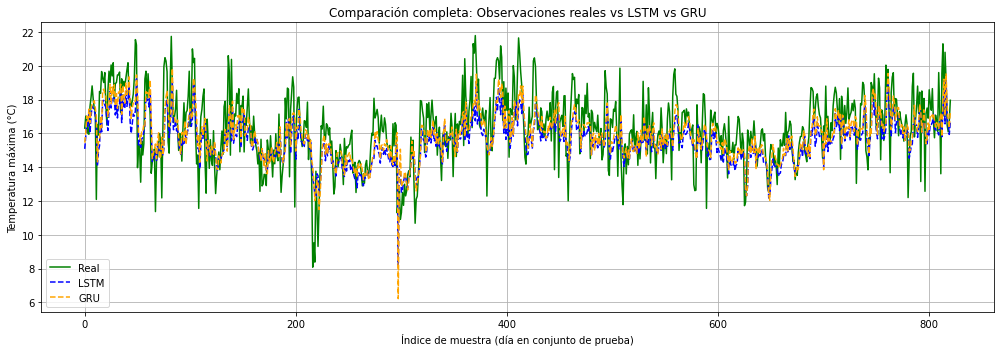

In [29]:
plt.figure(figsize=(14, 5))

# Curva de datos reales
plt.plot(y_test_inv, label='Real', color='green')

# Predicción LSTM
plt.plot(y_pred_inv, label='LSTM', color='blue', linestyle='--')

# Predicción GRU
plt.plot(y_pred_inv_gru, label='GRU', color='orange', linestyle='--')

plt.title("Comparación completa: Observaciones reales vs LSTM vs GRU")
plt.xlabel("Índice de muestra (día en conjunto de prueba)")
plt.ylabel("Temperatura máxima (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

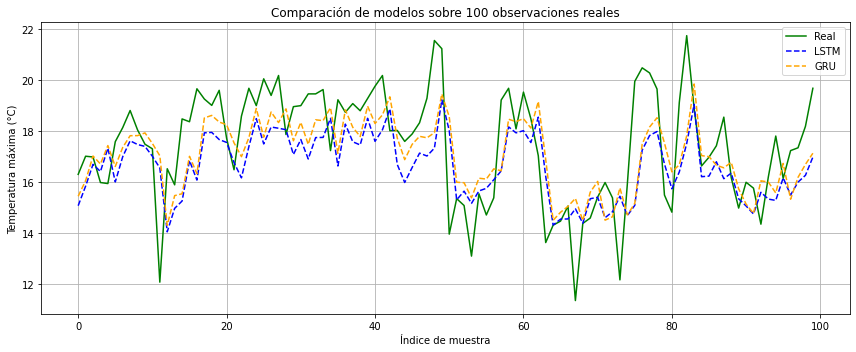

In [30]:
# Número de puntos a mostrar
n_points = 100

plt.figure(figsize=(12, 5))

# Curva de datos reales
plt.plot(y_test_inv[:n_points], label='Real', color='green')

# Predicción LSTM
plt.plot(y_pred_inv[:n_points], label='LSTM', color='blue', linestyle='--')

# Predicción GRU
plt.plot(y_pred_inv_gru[:n_points], label='GRU', color='orange', linestyle='--')

plt.title(f"Comparación de modelos sobre {n_points} observaciones reales")
plt.xlabel("Índice de muestra")
plt.ylabel("Temperatura máxima (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

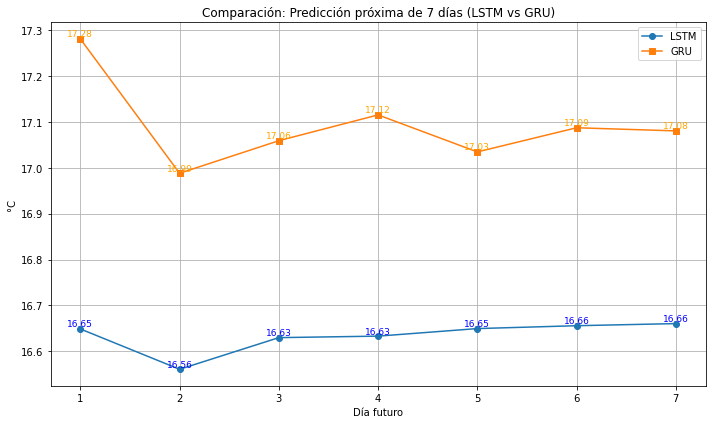

In [31]:
# Predicción de los 14 próximos días
plt.figure(figsize=(10, 6))
plt.plot(days, future_preds_lstm, marker='o', label="LSTM")
for i, value in enumerate(future_preds_lstm):
    plt.text(days[i], value + 0.005, f"{value:.2f}", ha='center', fontsize=9, color='blue')
plt.plot(days, future_preds_gru, marker='s', label="GRU")
for i, value in enumerate(future_preds_gru):
    plt.text(days[i], value + 0.005, f"{value:.2f}", ha='center', fontsize=9, color='orange')
plt.title("Comparación: Predicción próxima de 7 días (LSTM vs GRU)")
plt.xlabel("Día futuro")
plt.ylabel("°C")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Crear DataFrame de comparación
comparacion_metricas = pd.DataFrame({
    "Métrica": ["MAE (°C)", "RMSE (°C)", "R²"],
    "LSTM": [mae_best, rmse_best, r2_best],
    "GRU": [mae_gru, rmse_gru, r2_gru]
})

# Redondear los resultados
comparacion_metricas["LSTM"] = comparacion_metricas["LSTM"].apply(lambda x: round(x, 3))
comparacion_metricas["GRU"] = comparacion_metricas["GRU"].apply(lambda x: round(x, 3))

# Mostrar tabla
print(comparacion_metricas)

     Métrica   LSTM    GRU
0   MAE (°C)  1.388  1.277
1  RMSE (°C)  1.730  1.643
2         R²  0.305  0.373


In [33]:
# Exportar el modelo GRU
gru_model.save("gru_model_final.h5")

# Exportar el scaler
import joblib
joblib.dump(scaler, "scaler_gru.save")

print("✅ Archivos exportados correctamente.")

✅ Archivos exportados correctamente.
